In [1]:
from matplotlib import pyplot as plt
from utils.plotDecBoundaries import plotDecBoundaries
import numpy as np 
import pandas as pd
from scipy.spatial.distance import cdist

In [2]:
def avg(itr,start,end,x):
    sum = 0
    for i in range(start,end):
        if x==1:
            sum = itr[i,0]+sum
        else:
            sum = itr[i,1]+sum
    return(sum/50)

In [4]:
data = np.genfromtxt("/Users/prithvik/Documents/USC/Assignments/EE559/HW1/HW1_datasets/dataset1_train.csv", delimiter=',')
data_points = np.asarray(data[:,:2])
x = data[:, 0]
y = data[:, 1]
labels = data[:, 2]
sorted_labels = labels[labels.argsort()]
sorted_data = data[data[:, 2].argsort()]
sorted_data_points = np.asarray(sorted_data[:,:2])

In [6]:
test_data = np.genfromtxt("/Users/prithvik/Documents/USC/Assignments/EE559/HW1/HW1_datasets/dataset1_test.csv", delimiter=',')
test_data_points = np.asarray(test_data[:,:2])
test_x = test_data[:, 0]
test_y = test_data[:, 1]
test_labels = test_data[:, 2]
test_sorted_labels = test_labels[test_labels.argsort()]
test_sorted_data = test_data[test_data[:, 2].argsort()]
test_sorted_data_points = np.asarray(test_sorted_data[:,:2])

In [7]:
sample_means = np.zeros((2,2))
sample_means[0,0] = avg(sorted_data_points,0,50,1)
sample_means[0,1] = avg(sorted_data_points,0,50,0)
sample_means[1,0] = avg(sorted_data_points,50,100,1)
sample_means[1,1] = avg(sorted_data_points,50,100,0)

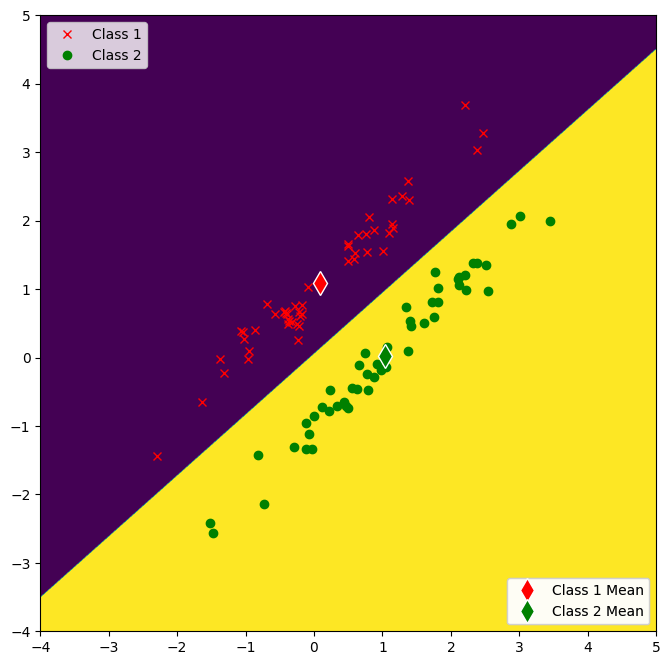

The Classification Error Rate for Training Data = 0%


In [8]:
plotDecBoundaries(data_points, labels, sample_means, fsize=(8,8))

dist_mat = cdist(data_points, sample_means)
pred_label = np.argmin(dist_mat, axis=1)
pred_label[:] = pred_label[:]+1

err_count = 0
for i in range(len(labels)):
    if (int(pred_label[i])!=int(labels[i])):
        err_count = err_count+1
err_rate = err_count/len(data_points)
print("The Classification Error Rate for Training Data = " + str(err_count) + "%")

In [ ]:
plotDecBoundaries(test_data_points, test_labels, sample_means, fsize=(8,8))

dist_mat = cdist(test_data_points, sample_means)
pred_label = np.argmin(dist_mat, axis=1)
pred_label[:] = pred_label[:]+1

err_count = 0
for i in range(len(labels)):
    if (int(pred_label[i])!=int(test_labels[i])):
        err_count = err_count+1
err_rate = err_count/len(data_points)
print("The Classification Error Rate for Test Data = " + str(err_count) + "%")

In [ ]:
feature_mean_x = np.mean(x)
feature_mean_y = np.mean(y)
feature_std_x = np.std(x)
feature_std_y = np.std(y)

norm_data = sorted_data_points.copy()
norm_data[:,0] = (norm_data[:,0]-feature_mean_x)/feature_std_x
norm_data[:,1] = (norm_data[:,1]-feature_mean_y)/feature_std_y

norm_sample_means = np.zeros((2,2))
norm_sample_means[0,0] = avg(norm_data,0,50,1)
norm_sample_means[0,1] = avg(norm_data,0,50,0)
norm_sample_means[1,0] = avg(norm_data,50,100,1)
norm_sample_means[1,1] = avg(norm_data,50,100,0)

In [ ]:
plotDecBoundaries(norm_data, sorted_labels, norm_sample_means, fsize=(8,8))

dist_mat = cdist(norm_data, norm_sample_means)
pred_label = np.argmin(dist_mat, axis=1)
pred_label[:] = pred_label[:]+1

err_count = 0
for i in range(len(labels)):
    if (int(pred_label[i])!=int(sorted_labels[i])):
        err_count = err_count+1
err_rate = err_count/len(data_points)
print("The Classification Error Rate after Standard Normalization Training Data = " + str(err_count) + "%")

In [ ]:
test_feature_mean_x = np.mean(test_x)
test_feature_mean_y = np.mean(test_y)
test_feature_std_x = np.std(test_x)
test_feature_std_y = np.std(test_y)

test_norm_data = test_sorted_data_points.copy()
test_norm_data[:,0] = (test_norm_data[:,0]-test_feature_mean_x)/test_feature_std_x
test_norm_data[:,1] = (test_norm_data[:,1]-test_feature_mean_y)/test_feature_std_y

plotDecBoundaries(test_norm_data, test_sorted_labels, norm_sample_means, fsize=(8,8))

dist_mat = cdist(test_norm_data, norm_sample_means)
pred_label = np.argmin(dist_mat, axis=1)
pred_label[:] = pred_label[:]+1

err_count = 0
for i in range(len(test_labels)):
    if (int(pred_label[i])!=int(test_sorted_labels[i])):
        err_count = err_count+1
err_rate = err_count/len(test_data_points)
print("The Classification Error Rate after Standard Normalization Test Data = " + str(err_count) + "%")

In [ ]:
rm_min = []
rm_min_err = 0
all_err = []

In [ ]:
errors=[]
for i in range(10):
    pro = []
    rm_sca=[10.0,float(i)]
    rm = np.asarray(rm_sca)
    rm_norm = np.linalg.norm(rm)
    for j in range(len(data_points)):
        pro.append((np.dot(norm_data[j], rm)/rm_norm**2)*rm)
    
    pro_array = np.asarray(pro)
    pro_sample_means = np.zeros((2,2))
    pro_sample_means[0,0] = avg(pro_array,0,50,1)
    pro_sample_means[0,1] = avg(pro_array,0,50,0)
    pro_sample_means[1,0] = avg(pro_array,50,100,1)
    pro_sample_means[1,1] = avg(pro_array,50,100,0)

    #plotDecBoundaries(pro_array, sorted_labels, pro_sample_means, fsize=(12,12))

    dist_mat = cdist(pro_array, pro_sample_means)
    pred_label = np.argmin(dist_mat, axis=1)
    pred_label[:] = pred_label[:]+1

    err_count = 0
    for k in range(len(labels)):
        if (int(pred_label[k])!=int(sorted_labels[k])):
            err_count = err_count+1
    errors.append(err_count)
    all_err.append(err_count)
    err_rate = err_count/len(data_points)

In [ ]:
errors=[]
for i in range(10,30):
    pro = []
    rm_sca = [20-i,10.0]
    rm = np.asarray(rm_sca)
    rm_norm = np.linalg.norm(rm)
    for j in range(len(data_points)):
        pro.append((np.dot(norm_data[j], rm)/rm_norm**2)*rm)
        
    pro_array = np.asarray(pro)
    pro_sample_means = np.zeros((2,2))
    pro_sample_means[0,0] = avg(pro_array,0,50,1)
    pro_sample_means[0,1] = avg(pro_array,0,50,0)
    pro_sample_means[1,0] = avg(pro_array,50,100,1)
    pro_sample_means[1,1] = avg(pro_array,50,100,0)

    #plotDecBoundaries(pro_array, sorted_labels, pro_sample_means, fsize=(12,12))

    dist_mat = cdist(pro_array, pro_sample_means)
    pred_label = np.argmin(dist_mat, axis=1)
    pred_label[:] = pred_label[:]+1

    err_count = 0
    for k in range(len(labels)):
        if (int(pred_label[k])!=int(sorted_labels[k])):
            err_count = err_count+1
    errors.append(err_count)
    err_rate = err_count/len(data_points)
    all_err.append(err_count)

In [ ]:
errors=[]
for i in range(30,40):
    pro = []
    rm_sca = [-10,40-i]
    rm = np.asarray(rm_sca)
    rm_norm = np.linalg.norm(rm)
    for j in range(len(data_points)):
        pro.append((np.dot(norm_data[j], rm)/rm_norm**2)*rm)

    pro_array = np.asarray(pro)
    pro_sample_means = np.zeros((2,2))
    pro_sample_means[0,0] = avg(pro_array,0,50,1)
    pro_sample_means[0,1] = avg(pro_array,0,50,0)
    pro_sample_means[1,0] = avg(pro_array,50,100,1)
    pro_sample_means[1,1] = avg(pro_array,50,100,0)

    #plotDecBoundaries(pro_array, sorted_labels, pro_sample_means, fsize=(12,12))

    dist_mat = cdist(pro_array, pro_sample_means)
    pred_label = np.argmin(dist_mat, axis=1)
    pred_label[:] = pred_label[:]+1

    err_count = 0
    for k in range(len(labels)):
        if (int(pred_label[k])!=int(sorted_labels[k])):
            err_count = err_count+1
    errors.append(err_count)
    err_rate = err_count/len(data_points)
    all_err.append(err_count)

In [ ]:
min_index = all_err.index(min(all_err))
rm_min = []

if min_index>=0 and min_index<10:
    rm_min = [10,min_index]
elif min_index>=10 and min_index<30:
    rm_min = [20-min_index,10]
else:
    rm_min = [-10,40-min_index]

plt.plot(range(0,40), all_err)
plt.xlabel("m")
plt.ylabel("error_rate")
plt.show()

print("The Vector with Rm with least error rate = " + str(rm_min) + " the m* value is " + str(min_index))

In [ ]:
rm_final = np.asarray(rm_min)
rm_norm_final = np.linalg.norm(rm_final)
pro_final=[]

for j in range(len(data_points)):
    pro_final.append((np.dot(norm_data[j], rm_final)/rm_norm_final**2)*rm_final)

pro_array_final = np.asarray(pro_final)
pro_final_sample_means = np.zeros((2,2))
pro_final_sample_means[0,0] = avg(pro_array_final,0,50,1)
pro_final_sample_means[0,1] = avg(pro_array_final,0,50,0)
pro_final_sample_means[1,0] = avg(pro_array_final,50,100,1)
pro_final_sample_means[1,1] = avg(pro_array_final,50,100,0)

dist_mat = cdist(pro_array_final, pro_final_sample_means)
pred_label = np.argmin(dist_mat, axis=1)
pred_label[:] = pred_label[:]+1

err_count = 0
for k in range(len(labels)):
    if (int(pred_label[k])!=int(sorted_labels[k])):
        err_count = err_count+1
errors.append(err_count)
err_rate = err_count/len(data_points)

plotDecBoundaries(pro_array_final, sorted_labels, pro_final_sample_means, fsize=(8,8))

print("The Classification Error Rate for Training Data = " + str(err_count) + "%")

In [ ]:
test_pro_final=[]

for j in range(len(test_data_points)):
    test_pro_final.append((np.dot(test_norm_data[j], rm_final)/rm_norm_final**2)*rm_final)

test_pro_array_final = np.asarray(test_pro_final)
test_pro_final_sample_means = np.zeros((2,2))
test_pro_final_sample_means[0,0] = avg(test_pro_array_final,0,50,1)
test_pro_final_sample_means[0,1] = avg(test_pro_array_final,0,50,0)
test_pro_final_sample_means[1,0] = avg(test_pro_array_final,50,100,1)
test_pro_final_sample_means[1,1] = avg(test_pro_array_final,50,100,0)

plotDecBoundaries(test_pro_array_final, test_sorted_labels, pro_final_sample_means, fsize=(8,8))

dist_mat = cdist(test_pro_array_final, pro_final_sample_means)
pred_label = np.argmin(dist_mat, axis=1)
pred_label[:] = pred_label[:]+1

err_count = 0
for i in range(len(labels)):
    if (int(pred_label[i])!=int(test_sorted_labels[i])):
        err_count = err_count+1
err_rate = err_count/len(data_points)
print("The Classification Error Rate for Testing Data = " + str(err_count) + "%")